In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv('StudentsPerformance.csv')
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [6]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype

In [7]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# One-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()


,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


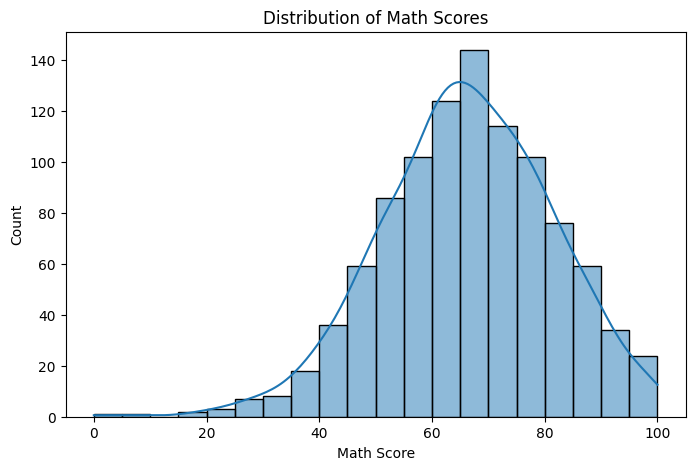

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['math score'], bins=20, kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.show()


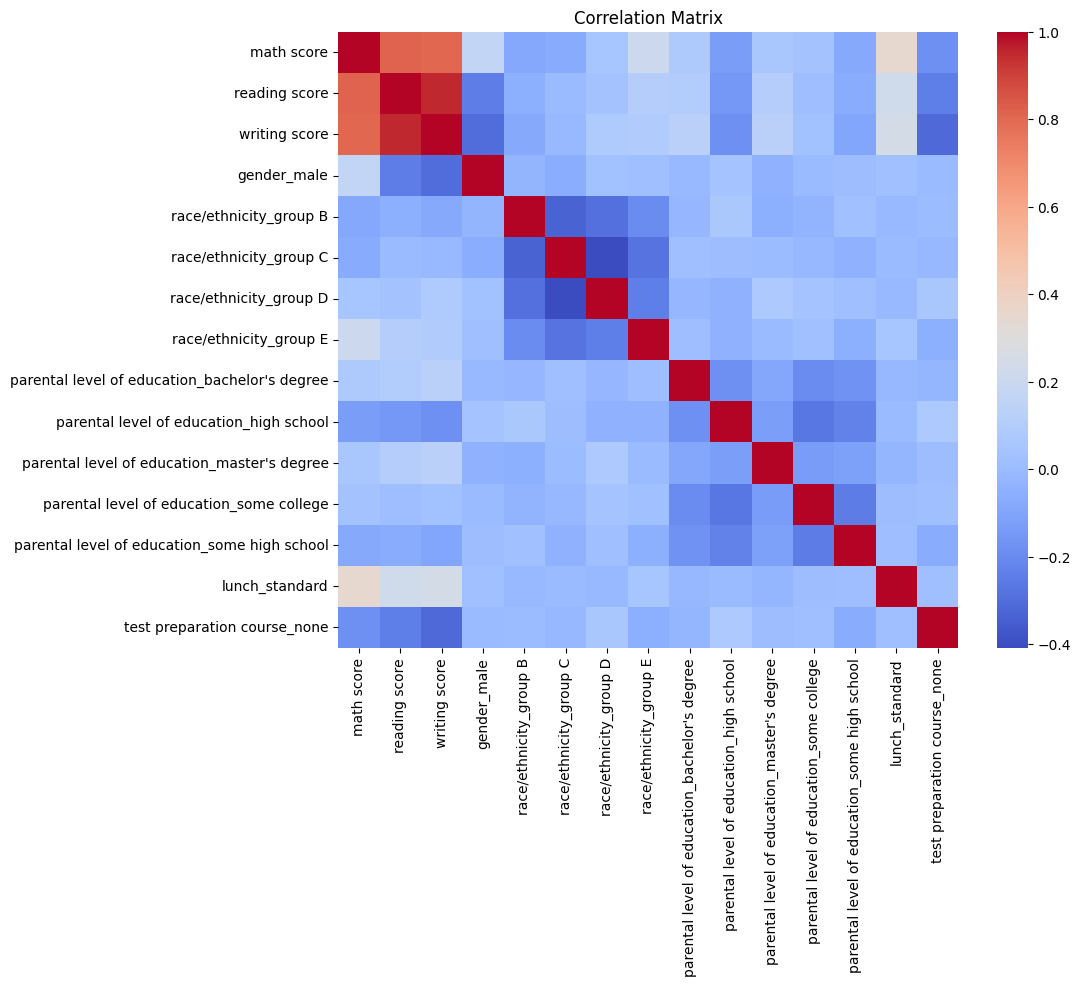

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


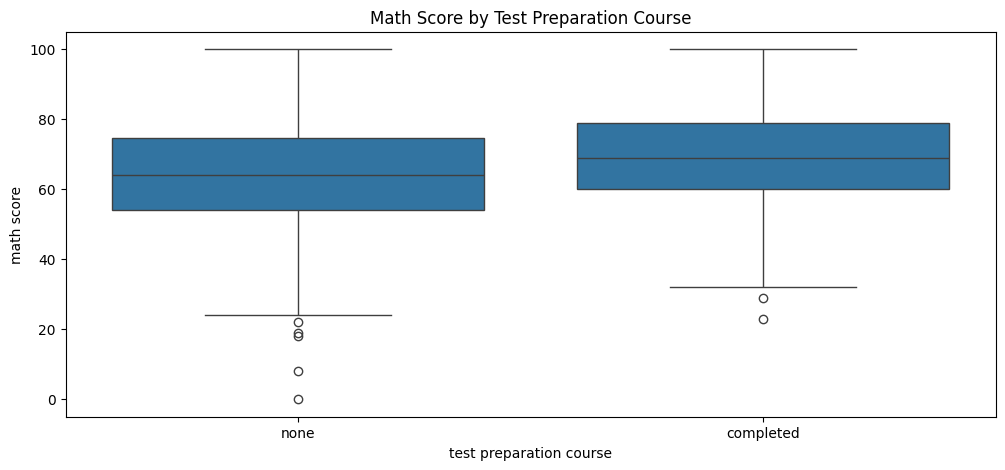

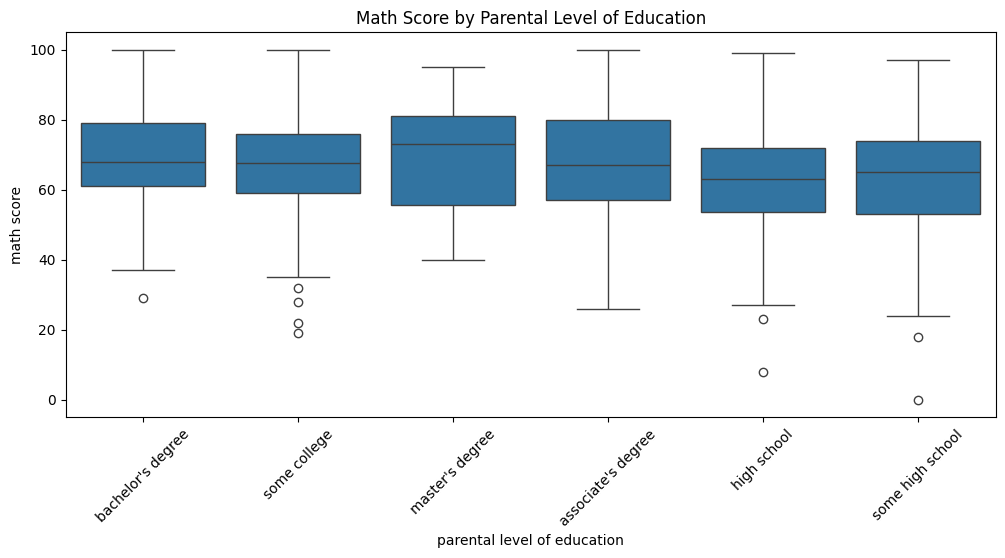

In [10]:
plt.figure(figsize=(12,5))
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Math Score by Test Preparation Course')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title('Math Score by Parental Level of Education')
plt.xticks(rotation=45)
plt.show()


In [11]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype

In [12]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# One-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()


,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


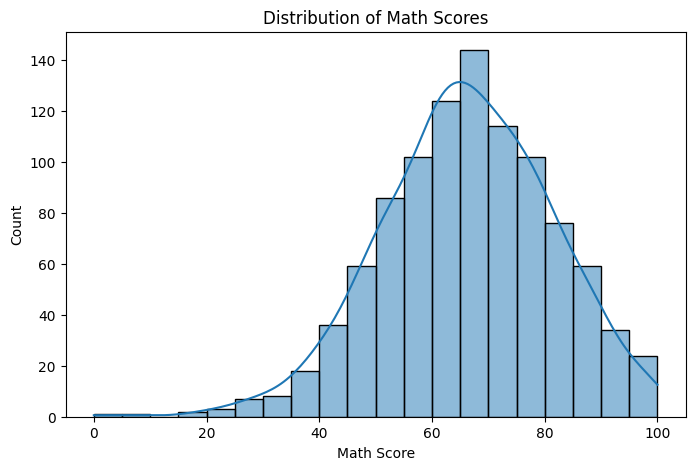

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['math score'], bins=20, kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.show()


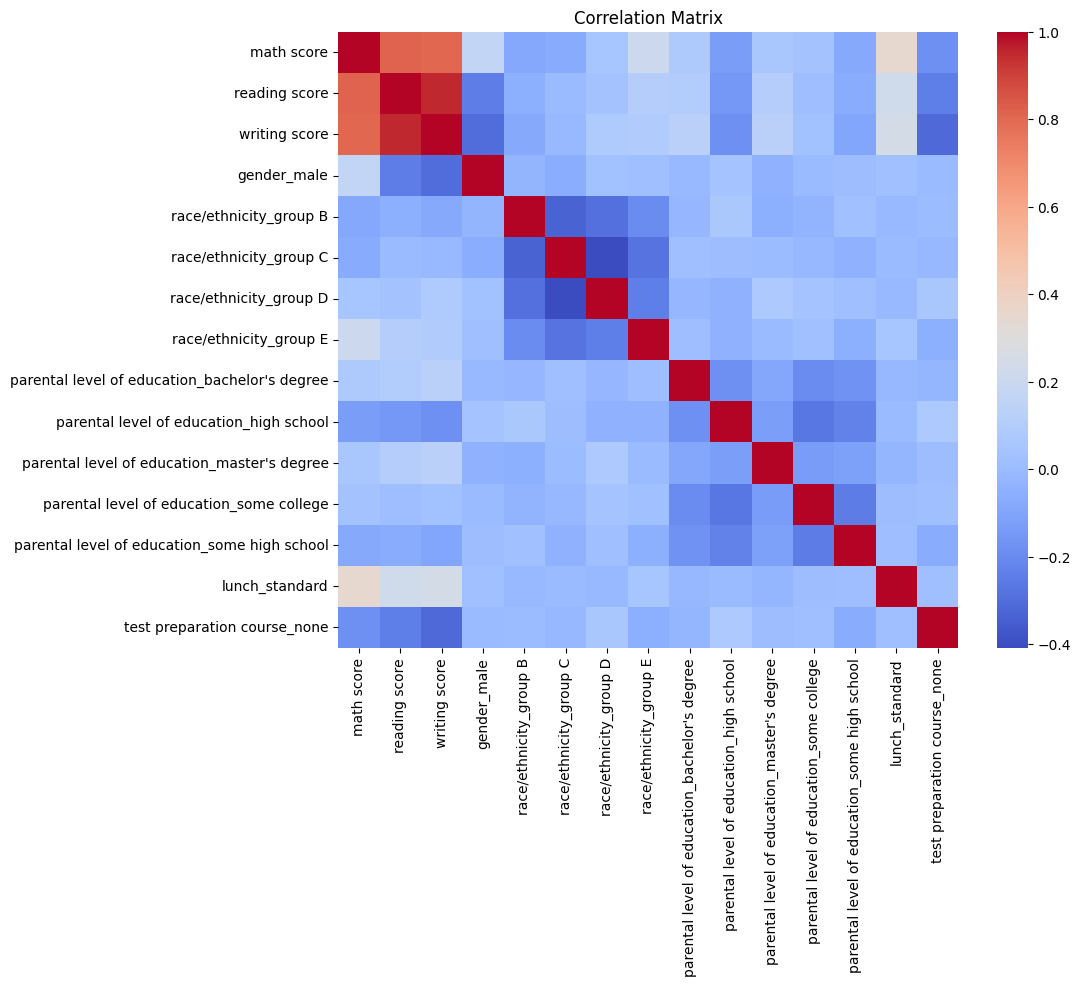

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


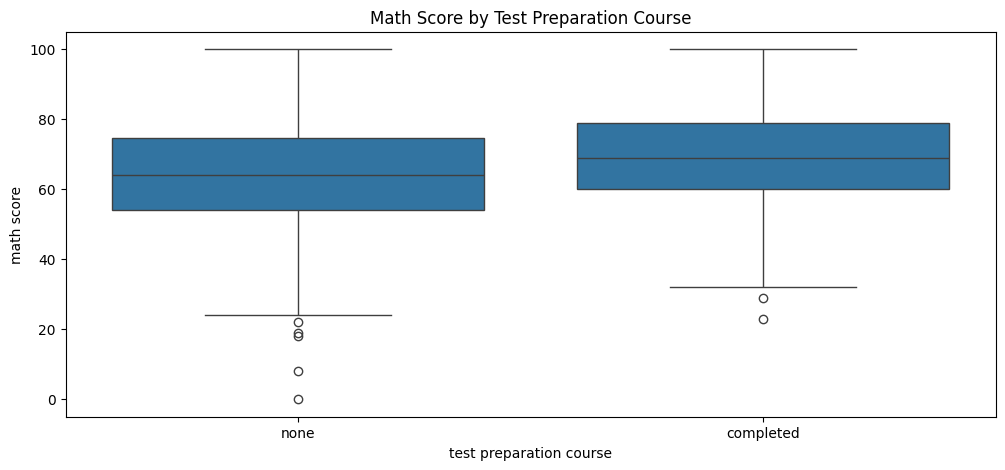

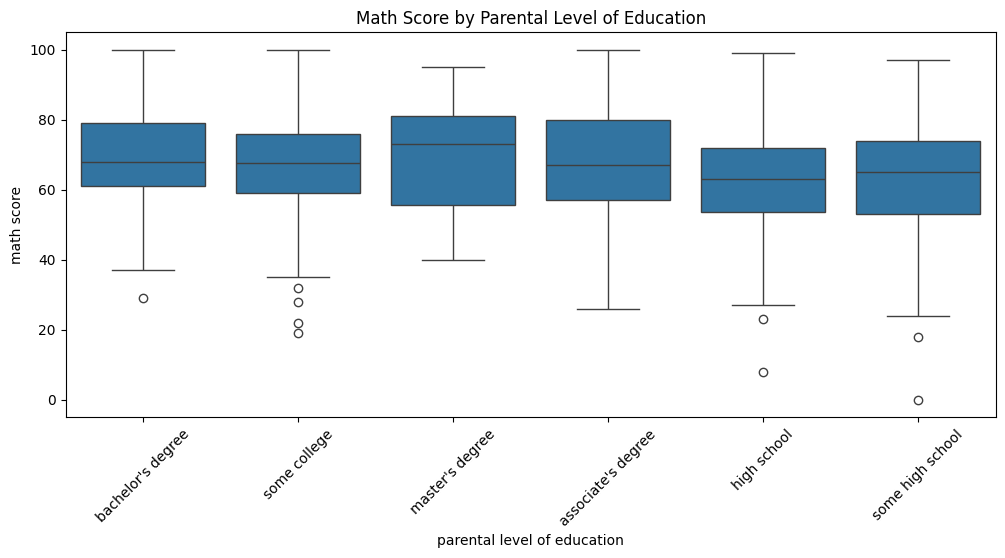

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Math Score by Test Preparation Course')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title('Math Score by Parental Level of Education')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Exclude other score columns to avoid data leakage
features = [col for col in df_encoded.columns if col not in ['math score', 'reading score', 'writing score']]
X = df_encoded[features]
y = df_encoded['math score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [18]:
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R^2 Score: 0.17599998338251166
MAE: 11.269872775277623
RMSE: 14.160185226319358


In [19]:
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R^2 Score: 0.17599998338251166
MAE: 11.269872775277623
RMSE: 14.160185226319358


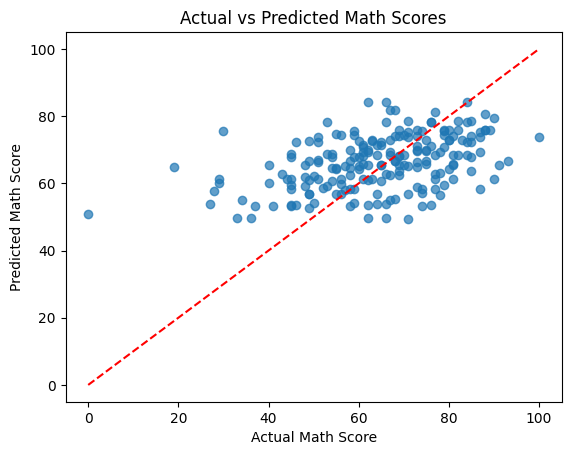

In [20]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


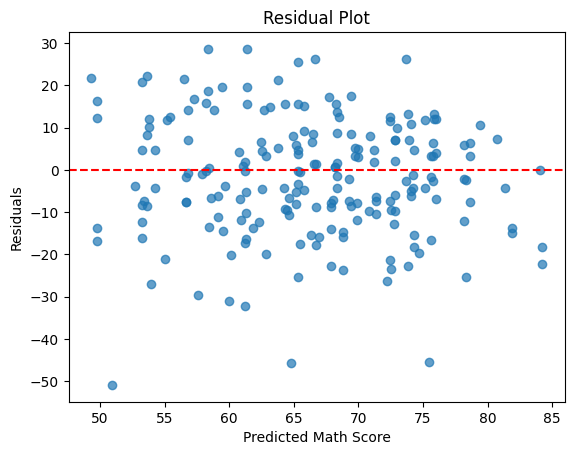

In [21]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Math Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [22]:
# Test preparation
prep_means = df.groupby('test preparation course')['math score'].mean()
print("Average Math Score by Test Preparation Course:\n", prep_means)

# Parental education
parent_means = df.groupby('parental level of education')['math score'].mean()
print("\nAverage Math Score by Parental Education:\n", parent_means)


Average Math Score by Test Preparation Course:
 test preparation course
completed    69.695531
none         64.077882
Name: math score, dtype: float64

Average Math Score by Parental Education:
 parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64


In [23]:
# Display coefficients for test prep and parental education
coefs = pd.Series(lr.coef_, index=X.columns)
print("\nModel Coefficients for Test Preparation and Parental Education:")
print(coefs.filter(like='test preparation course'))
print(coefs.filter(like='parental level of education'))



Model Coefficients for Test Preparation and Parental Education:
test preparation course_none   -5.874513
dtype: float64
parental level of education_bachelor's degree    3.119051
parental level of education_high school         -4.090503
parental level of education_master's degree      1.074605
parental level of education_some college        -0.145008
parental level of education_some high school    -2.896392
dtype: float64


In [25]:
# Test preparation
prep_means = df.groupby('test preparation course')['math score'].mean()
print("Average Math Score by Test Preparation Course:\n", prep_means)

# Parental education
parent_means = df.groupby('parental level of education')['math score'].mean()
print("\nAverage Math Score by Parental Education:\n", parent_means)


Average Math Score by Test Preparation Course:
 test preparation course
completed    69.695531
none         64.077882
Name: math score, dtype: float64

Average Math Score by Parental Education:
 parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64


In [26]:
# Display coefficients for test prep and parental education
coefs = pd.Series(lr.coef_, index=X.columns)
print("\nModel Coefficients for Test Preparation and Parental Education:")
print(coefs.filter(like='test preparation course'))
print(coefs.filter(like='parental level of education'))



Model Coefficients for Test Preparation and Parental Education:
test preparation course_none   -5.874513
dtype: float64
parental level of education_bachelor's degree    3.119051
parental level of education_high school         -4.090503
parental level of education_master's degree      1.074605
parental level of education_some college        -0.145008
parental level of education_some high school    -2.896392
dtype: float64


In [27]:
# Separate models for each gender
for gender in df['gender'].unique():
    df_gender = df[df['gender'] == gender]
    df_gender_encoded = pd.get_dummies(df_gender, columns=categorical_cols, drop_first=True)
    features_gender = [col for col in df_gender_encoded.columns if col not in ['math score', 'reading score', 'writing score']]
    Xg = df_gender_encoded[features_gender]
    yg = df_gender_encoded['math score']
    
    Xg_train, Xg_test, yg_train, yg_test = train_test_split(Xg, yg, test_size=0.2, random_state=42)
    lrg = LinearRegression()
    lrg.fit(Xg_train, yg_train)
    yg_pred = lrg.predict(Xg_test)
    
    print(f"Gender: {gender}")
    print("  R^2 Score:", r2_score(yg_test, yg_pred))
    print("  MAE:", mean_absolute_error(yg_test, yg_pred))
    print("  RMSE:", np.sqrt(mean_squared_error(yg_test, yg_pred)))
    print()


Gender: female
  R^2 Score: 0.26634350746426927
  MAE: 11.7536673738148
  RMSE: 14.846560691965323

Gender: male
  R^2 Score: 0.12255490865088636
  MAE: 10.258579670199815
  RMSE: 13.200365407638467

